In [1]:
import igraph as ig


In [2]:
g=ig.Graph()

In [3]:
g=ig.Graph.Famous('Zachary')

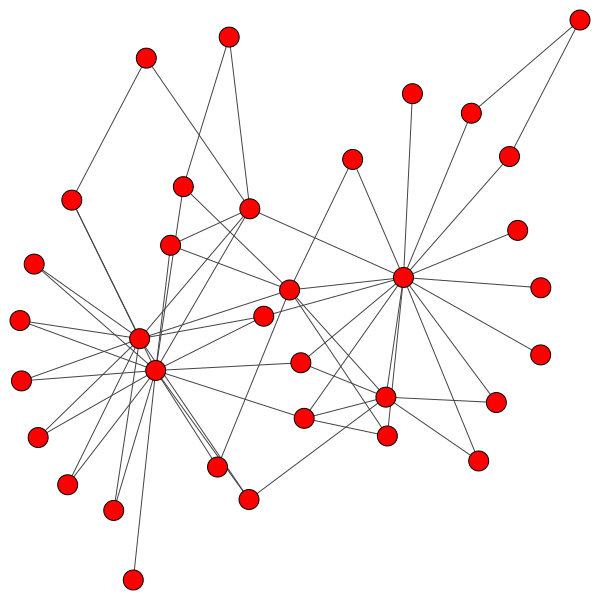

In [31]:
ig.plot(g)
# gn=ig.Graph()
# gn.add_vertices(g.vcount())
# ig.plot(gn)

In [27]:
def min_edge_betweenness(g,L,EBList):
    EdgeList=[]
    
    min_eb=min(EBList)
    EdgeList=[g.es[idx].tuple for idx, eb in enumerate(EBList) if eb == min_eb]
    print(min_eb)
    return EdgeList

In [6]:
def actual_end_point(g,M,e,S):
    source=e[0]
    target=e[1]
    for v1 in M:
        if v1==source:
            for v2 in M:
                if v2==target and g.are_connected(v1,v2) and [edge for edge in S if edge==e].length==0 and e==(v1,v2):
                    source=v1
                    target=v2
                    break
    return source,target

In [7]:
def bfs(g,node):
    t={}
    q=Queue()
    q.put(node)
    while (q.size()):
        v=q.get()
        for neigh in g.neighbors(v,mode=all):
            if neigh in t:
                t.add(neigh)
                q.put(neigh)
    return t        
            
def connected_components(g,n):
    S={}
    T={}
    for i in range(n):
        if i not in T:
            S1=bfs(g,i)
            for v in S1:
                T.add(v)
                S.union(S1)
            
    return S

In [8]:
def vertexCluster(g,v):
    p=bfs(g,v)
    return p

In [9]:
def communities_from_connected_components(g,S):
    M=[10000000 for i in range(g.vcount())]
    for c in S:
        ind = 10000000000;
        for i in c:
            if i<ind:
                ind=i
        for i in c:
            M[i]=ind
    vectexCluster=M
    return vertexCluster
                

In [28]:

def ACUEB_without_meta(g,times):
    Q=0
    M=[i for i in range(g.vcount())]
    g1=ig.Graph()
    n=g.vcount()
#     print(n)
    g1.add_vertices(n)
    
    L=[]
#     print(g1.summary())
    i=0
    while(i<times):
        i=i+1
        EBList=g.edge_betweenness()
        print(EBList)
        edgeList=min_edge_betweenness(g,L,EBList)
        L=L+edgeList
        g1.add_edges(edgeList)
        g.delete_edges(edgeList)
#         print(len(M))
#         print(g1.vcount())
        
        Q1=g1.modularity(M)
#         print(Q1)
        if Q1>Q:
            Q=Q1
        elif i>10 or g.ecount()==0:
            break
    print(Q)
    return g1

[20.866666666666667, 46.63075396825398, 15.533333333333333, 33.0, 47.0, 47.0, 17.976190476190474, 41.0950396825397, 33.0, 33.0, 33.0, 26.257341269841284, 23.509523809523817, 27.436507936507944, 23.509523809523813, 72.65059523809524, 14.695833333333336, 7.56309523809524, 9.490476190476189, 7.204761904761906, 9.490476190476189, 21.03392857142858, 10.795833333333333, 15.023809523809524, 22.141269841269835, 12.319047619047616, 39.266865079365076, 17.285714285714285, 7.4625, 17.0, 17.0, 18.887698412698413, 25.29900793650794, 17.619047619047617, 38.79960317460318, 13.824404761904765, 19.83392857142857, 13.824404761904765, 19.83392857142857, 13.824404761904765, 19.83392857142857, 33.30793650793651, 13.824404761904763, 19.83392857142857, 13.824404761904763, 19.833928571428572, 10.322222222222223, 6.355555555555555, 13.8125, 20.10138888888889, 9.916666666666664, 24.08333333333333, 25.38888888888889, 33.0, 19.03571428571429, 8.7, 14.952380952380953, 13.824404761904763, 19.833928571428572, 11.225

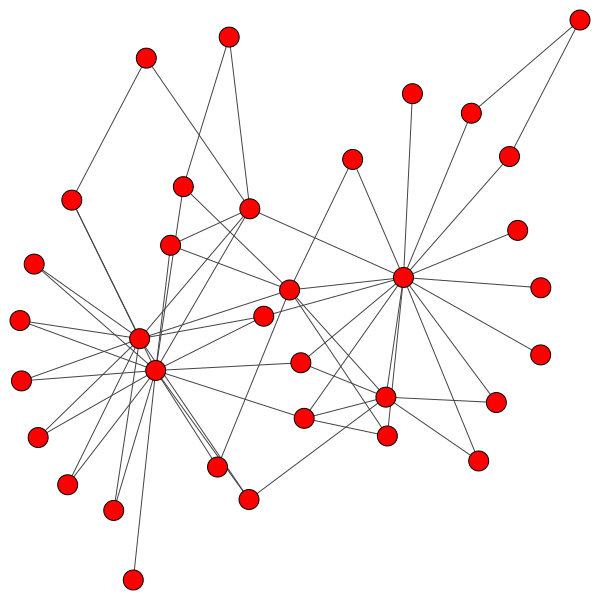

In [30]:
g1=ACUEB_without_meta(g,1)
ig.plot(g)